In [ ]:
# Import necessary libraries

import tensorflow as tf
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from tensorflow.keras import datasets,models,layers
from sklearn.model_selection import train_test_split

In [ ]:
# Load the CIFAR-10 dataset from tensorflow datasets
data = tf.keras.datasets.cifar10

# Split the dataset into training and testing sets
(train_images, train_labels), (test_images, test_labels) = data.load_data()

In [ ]:
# Define the model architecture using a Sequential model

model = tf.keras.models.Sequential([
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same', input_shape=(32, 32, 3)),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(32, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.25),

                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(64, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.3),

                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Conv2D(128, (3, 3), activation='relu', kernel_initializer='he_uniform', padding='same'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.MaxPooling2D(2, 2),
                        tf.keras.layers.Dropout(0.4),
                        tf.keras.layers.Flatten(),

                        tf.keras.layers.Dense(128, activation='relu', kernel_initializer='he_uniform'),
                        tf.keras.layers.BatchNormalization(),
                        tf.keras.layers.Dropout(0.5),
                        tf.keras.layers.Dense(10, activation='softmax')])

In [ ]:
# Compile the model with Adam optimizer and sparse categorical crossentropy loss function
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

In [ ]:
# Train the model for 200 epochs and validate it on the val set
history = model.fit(x_train, y_train, epochs=2000,
                    batch_size=32,
                    validation_data=(x_val, y_val))

In [ ]:
# Data on each Accuracy and Loss
print("Max Training Accuracy:", round(max(history.history['accuracy']), 4))
print("Max Validation Accuracy:", round(max(history.history['val_accuracy']), 4))
print("Min Loss:", round(max(history.history['loss']), 4))
print("Min Validation Loss:", round(max(history.history['val_loss']), 4))

In [ ]:
# Evaluation of test data
test_loss_cnn, test_acc_cnn = model.evaluate(test_images, test_labels, verbose=2)

In [ ]:
# Plot the training and validation accuracy and loss over the epochs
plt.plot(history.history['accuracy'], label='training')
plt.plot(history.history['val_accuracy'], label = 'test')
plt.plot(history.history['loss'], label = 'loss')
plt.plot(history.history['val_loss'], label = 'val_loss')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.ylim([0.5, 1.5])
plt.legend(loc='upper right')

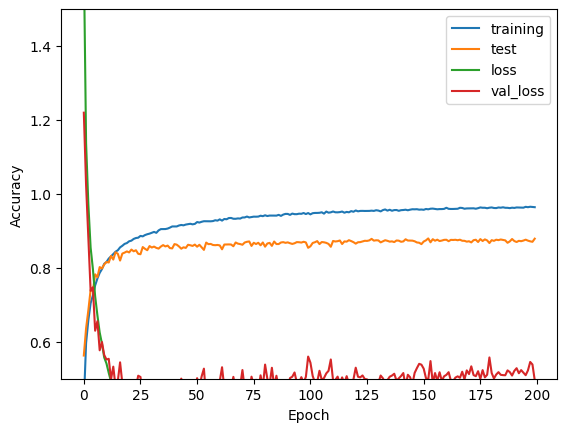